In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import  silhouette_score


%matplotlib inline


In [22]:
url='iris.csv'
iris=pd.read_csv(url,sep=",")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
iris.drop(['Id','Species'], axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
from scipy.cluster.hierarchy import dendrogram,linkage

iris_std=pd.DataFrame(scale(iris), columns=list(iris.columns))
iris_std.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


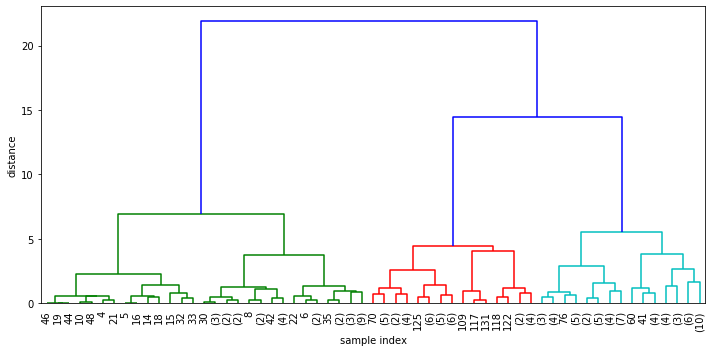

In [19]:
plt.figure(figsize=(10,5))
plt.xlabel('sample index')
plt.ylabel('distance')
z = linkage(iris_std,method='ward')
dendrogram(z,leaf_rotation=90,p = 5,color_threshold=10,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [6]:
iris=iris[["SepalLengthCm","SepalWidthCm"]]
iris.describe()

,SepalLengthCm,SepalWidthCm
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [8]:
iris_std=pd.DataFrame(scale(iris),
                      columns=list(iris.columns))
iris_std.describe()

,SepalLengthCm,SepalWidthCm
count,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16
std,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00
25%,-9.006812e-01,-5.877635e-01
50%,-5.250608e-02,-1.249576e-01
75%,6.745011e-01,5.692513e-01
max,2.492019e+00,3.114684e+00


In [10]:
for n_clusters in range(2,20):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(iris_std)
    silhouette_avg = silhouette_score(iris_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

For n_clusters = 2 The average silhouette_score is: 0.4459060947252491
For n_clusters = 3 The average silhouette_score is: 0.43625503443265584
For n_clusters = 4 The average silhouette_score is: 0.41962617423723664
For n_clusters = 5 The average silhouette_score is: 0.35319063401403256
For n_clusters = 6 The average silhouette_score is: 0.3626260050791639
For n_clusters = 7 The average silhouette_score is: 0.386689215046107
For n_clusters = 8 The average silhouette_score is: 0.39589327272812663
For n_clusters = 9 The average silhouette_score is: 0.3914603601027887
For n_clusters = 10 The average silhouette_score is: 0.3790113833745723
For n_clusters = 11 The average silhouette_score is: 0.4028929350818648
For n_clusters = 12 The average silhouette_score is: 0.4100227082752638
For n_clusters = 13 The average silhouette_score is: 0.39617762525720146
For n_clusters = 14 The average silhouette_score is: 0.38519438596551697
For n_clusters = 15 The average silhouette_score is: 0.388583844490

C:\Users\MansiGupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


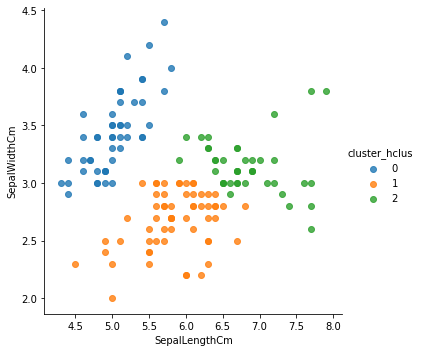

In [14]:
hclus=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
labels_hclus=hclus.fit_predict(iris_std)
iris['cluster_hclus']=labels_hclus
sns.lmplot(fit_reg=False,x="SepalLengthCm",y="SepalWidthCm",data=iris,hue='cluster_hclus')

In [15]:
iris.head()

,SepalLengthCm,SepalWidthCm,cluster_hclus
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
